In [1]:
from glob import glob
import os
import gc
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point

import warnings
warnings.filterwarnings('ignore')

<h1 style="color:red">Data Reader Function</h1>

In [2]:
%%time
def _data_reader(variables:list,
                 path:str,
                 start_year:int,
                 end_year:int,
                 lat_min:float,
                 lat_max:float,
                 lon_min:float,
                 lon_max:float):
    
    years = np.arange(start_year, end_year+1); years = years[(years >= 1980) & (years <=2014)]; # years has been restricted from 1980 to 2014
    store = []; var_dict = {}
    for i, variable in enumerate(variables):
        for j, year in enumerate(years):
            file = glob(os.path.join(f'{path}{year}/*_{variable}.*.nc'))[0] #find path
            if i == 0:
                store.append(file)
                data = xr.open_mfdataset(store).sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, lon_max))
                var_dict[variable] = data.load()
            elif i == 1:
                store.clear()
                store.append(file)
                data = xr.open_mfdataset(store).sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, lon_max))
                var_dict[variable] = data.load()
            elif i == 2:
                store.clear()
                store.append(file)
                data = xr.open_mfdataset(store).sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, lon_max))
                var_dict[variable] = data.load()
            elif i == 3:
                store.clear()
                store.append(file)
                data = xr.open_mfdataset(store).sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, lon_max))
                var_dict[variable] = data.load()
            elif i == 4:
                store.clear()
                store.append(file)
                data = xr.open_mfdataset(store).sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, lon_max))
                var_dict[variable] = data.load()
            elif i == 5:
                store.clear()
                store.append(file)
                data = xr.open_mfdataset(store).sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, lon_max))
                var_dict[variable] = data.load()
            elif i == 6:
                store.clear()
                store.append(file)
                data = xr.open_mfdataset(store).sel(latitude=slice(lat_max, lat_min), longitude=slice(lon_min, lon_max))
                var_dict[variable] = data.load()
            else: #modify when variable is more than four
                store.clear()
                
    return var_dict

gc.collect()
  


CPU times: user 68.9 ms, sys: 0 ns, total: 68.9 ms
Wall time: 73.1 ms


34

<h1 style="color:red">Calling data variables</h1>

In [3]:
%%time
# variables = ['10u', '10v', '2t', '2d', 'msl']

path = '/glade/collections/rda/data/ds633.1/e5.moda.an.sfc/'
rain_path = '/glade/collections/rda/data/ds633.1/e5.moda.fc.sfc.instan/'

print('============== starting u ===================')
u = _data_reader(variables=['10u'], path=path, start_year=1980, end_year=2014,lat_min=-90, lat_max=90, lon_min=0, lon_max=359.8)['10u']
print('=========== u done =====================')
print()
print()

print('============== starting v ===================')
v = _data_reader(variables=['10v'], path=path, start_year=1980, end_year=2014,lat_min=-90, lat_max=90, lon_min=0, lon_max=359.8 )['10v']
print('=========== v done =====================')
print()
print()

print('============== starting 2t ===================')
t = _data_reader(variables=['2t'], path=path, start_year=1980, end_year=2014,lat_min=-90, lat_max=90, lon_min=0, lon_max=359.8 )['2t']
print('=========== v done =====================')
print()
print()


print('============== starting 2d ===================')
d = _data_reader(variables=['2d'], path=path, start_year=1980, end_year=2014,lat_min=-90, lat_max=90, lon_min=0, lon_max=359.8 )['2d']
print('=========== d done =====================')
print()
print()


print('============== starting msl ===================')
msl = _data_reader(variables=['msl'], path=path, start_year=1980, end_year=2014,lat_min=-90, lat_max=90, lon_min=0, lon_max=359.8 )['msl']
print('============== msl done ===================')
print()
print()



print('============== starting crr ===================')
crr = _data_reader(variables=['crr'], path=rain_path, start_year=1980, end_year=2014,lat_min=-90, lat_max=90, lon_min=0, lon_max=359.8 )['crr']
print('============== crr done ===================')
print()
print()




print('============== starting lsrr ===================')
lsrr = _data_reader(variables=['lsrr'], path=rain_path, start_year=1980, end_year=2014,lat_min=-90, lat_max=90, lon_min=0, lon_max=359.8 )['lsrr']
print('============== lsrr done ===================')
print()
print()
print("========= DONE!!!!! ================")


============== starting u ===================
=========== u done =====================


============== starting v ===================
=========== v done =====================


============== starting 2t ===================
=========== v done =====================


============== starting 2d ===================
=========== d done =====================


============== starting msl ===================
============== msl done ===================


============== starting crr ===================
============== crr done ===================


============== starting lsrr ===================
============== lsrr done ===================


========= DONE!!!!! ================
CPU times: user 16min 18s, sys: 2min 50s, total: 19min 9s
Wall time: 20min 12s


<h1 style="color:red">Merging variables and reading it into memory</h1>

In [4]:
%%time
data = xr.merge([u, v, t, d, msl, crr, lsrr]) 
data

CPU times: user 3.76 ms, sys: 0 ns, total: 3.76 ms
Wall time: 3.77 ms


<xarray.Dataset>
Dimensions:    (time: 420, latitude: 721, longitude: 1440)
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2014-12-01
Data variables:
    VAR_10U    (time, latitude, longitude) float32 0.01141 0.01141 ... 0.3639
    utc_date   (time) int32 1980010100 1980020100 ... 2014110100 2014120100
    VAR_10V    (time, latitude, longitude) float32 -0.1008 -0.1008 ... 0.08426
    VAR_2T     (time, latitude, longitude) float32 250.4 250.4 ... 246.2 246.2
    VAR_2D     (time, latitude, longitude) float32 247.7 247.7 ... 242.5 242.5
    MSL        (time, latitude, longitude) float32 1.024e+05 ... 9.973e+04
    CRR        (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    LSRR       (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    DATA_SOURCE:          ECMWF: https://cds.climate.copernicus.eu, Copernicu...
    NETCDF_CONVERSION:    CISL RDA: Conversion from ECMWF GRIB 1 data to netC...
    NETCDF_VERSION:       4.6.1
    CONVERSION_PLATFORM:  Linux casper02 3.10.0-693.21.1.el7.x86_64 #1 SMP We...
    CONVERSION_DATE:      Mon Nov 11 08:03:22 MST 2019
    Conventions:          CF-1.6
    NETCDF_COMPRESSION:   NCO: Precision-preserving compression to netCDF4/HD...
    history:              Mon Nov 11 08:03:23 2019: ncks -4 --ppc default=7 e...
    NCO:                  netCDF Operators version 4.7.9 (Homepage = http://n...

### *selecting temperature, dew point, mean sea level, zonal and meridional wind, crr and lsrr data*

In [7]:
%%time
temp_data = data['VAR_2T']
dew_point_data = data['VAR_2D']
msl_data = data['MSL']
zonal_wind_data = data['VAR_10U']
meridional_wind_data = data['VAR_10V']
crr_data = data['CRR']
lsrr_data = data['LSRR']

gc.collect()

CPU times: user 83.4 ms, sys: 3.11 ms, total: 86.6 ms
Wall time: 89.2 ms


187

<h1 style="color:red">Trends</h1>

In [8]:
def _linregress(data):
    # import numpy as np
    from scipy import stats
    #Input array is 1-D in time
    #This function computes the linear trend in a time series
    #using stats.linregress. The final units are per time step
    #of data. E.g., if the data are monthly means, then the
    #Returned trend is in <units>/month
    #Function computes linear regression at individual gridpoint
    slope = stats.linregress(np.arange(0,len(data)),data).slope
    return (slope)

In [9]:
def _trends(array):
    #Input array is f(time,latitude,longitude)
    #Applies _linregress at each spatial grid point
    trend = xr.apply_ufunc(
    _linregress,
    array,
    input_core_dims=[["time"]], # list with one entry per arg
    exclude_dims=set((["time"])), # dimensions allowed to change size. Must be a set!
    vectorize=True, # loop over non-core dims
    )
    return (trend)

### *temperature trends*

In [10]:
%%time
temp_trend = _trends(temp_data)
temp_trend

CPU times: user 3min, sys: 116 ms, total: 3min
Wall time: 3min 3s


<xarray.DataArray 'VAR_2T' (latitude: 721, longitude: 1440)>
array([[ 0.00422453,  0.00422453,  0.00422453, ...,  0.00422453,
         0.00422453,  0.00422453],
       [ 0.00357496,  0.00357698,  0.00357919, ...,  0.00357055,
         0.00357201,  0.00357352],
       [ 0.00304772,  0.00305111,  0.0030544 , ...,  0.0030372 ,
         0.00304019,  0.00304423],
       ...,
       [-0.0021164 , -0.0021158 , -0.00211602, ..., -0.00211643,
        -0.00211598, -0.00211675],
       [-0.00214077, -0.0021411 , -0.0021411 , ..., -0.00214108,
        -0.00214131, -0.00214107],
       [-0.00220212, -0.00220212, -0.00220212, ..., -0.00220212,
        -0.00220212, -0.00220212]])
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

### *dewpoint temperature trend*

In [11]:
%%time
dew_point_trend = _trends(dew_point_data)
dew_point_trend

CPU times: user 3min 2s, sys: 1.18 ms, total: 3min 2s
Wall time: 3min 6s


<xarray.DataArray 'VAR_2D' (latitude: 721, longitude: 1440)>
array([[ 0.00484561,  0.00484561,  0.00484561, ...,  0.00484561,
         0.00484561,  0.00484561],
       [ 0.00428796,  0.00428986,  0.0042912 , ...,  0.00428255,
         0.00428449,  0.00428608],
       [ 0.00385181,  0.00385531,  0.00385954, ...,  0.0038409 ,
         0.00384434,  0.00384794],
       ...,
       [-0.00220385, -0.00220388, -0.00220389, ..., -0.00220363,
        -0.00220374, -0.00220365],
       [-0.00221844, -0.0022186 , -0.00221864, ..., -0.00221835,
        -0.00221826, -0.00221845],
       [-0.00224413, -0.00224413, -0.00224413, ..., -0.00224413,
        -0.00224413, -0.00224413]])
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

### *mean sea level trend*

In [12]:
%%time
msl_trend = _trends(msl_data)
msl_trend

CPU times: user 3min 1s, sys: 4.24 ms, total: 3min 1s
Wall time: 3min 4s


<xarray.DataArray 'MSL' (latitude: 721, longitude: 1440)>
array([[ 0.12456349,  0.12456349,  0.12456349, ...,  0.12456349,
         0.12456349,  0.12456349],
       [ 0.12725668,  0.12720639,  0.12720288, ...,  0.12740118,
         0.12736329,  0.12728979],
       [ 0.13047272,  0.13044164,  0.13035279, ...,  0.13074021,
         0.13062593,  0.13054152],
       ...,
       [-0.00437763, -0.00434698, -0.00432926, ..., -0.00438726,
        -0.00436173, -0.00433486],
       [ 0.00626859,  0.00629559,  0.0063306 , ...,  0.00623097,
         0.00624316,  0.00621692],
       [ 0.01580087,  0.01580087,  0.01580087, ...,  0.01580087,
         0.01580087,  0.01580087]])
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

### *10-m zonal wind (10u) trend*


In [14]:
%%time
zonal_wind_trend = _trends(zonal_wind_data)
zonal_wind_trend

CPU times: user 3min 5s, sys: 10.2 ms, total: 3min 5s
Wall time: 3min 9s


<xarray.DataArray 'VAR_10U' (latitude: 721, longitude: 1440)>
array([[-9.76607827e-06, -9.76607827e-06, -9.76607827e-06, ...,
        -9.76607827e-06, -9.76607827e-06, -9.76607827e-06],
       [ 4.98358808e-04,  4.96208389e-04,  4.93973940e-04, ...,
         5.03522328e-04,  5.01679440e-04,  4.99940155e-04],
       [ 5.59153371e-04,  5.56554014e-04,  5.52975954e-04, ...,
         5.67460368e-04,  5.64144482e-04,  5.61383431e-04],
       ...,
       [-4.96009529e-04, -4.95129685e-04, -4.93249744e-04, ...,
        -5.00194663e-04, -4.98410061e-04, -4.96912586e-04],
       [-4.00602201e-04, -3.99370617e-04, -3.98074339e-04, ...,
        -4.03711868e-04, -4.02665387e-04, -4.01631204e-04],
       [ 4.17207587e-05,  4.17207587e-05,  4.17207587e-05, ...,
         4.17207587e-05,  4.17207587e-05,  4.17207587e-05]])
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

### *10-m meridional wind (10v) trend*


In [15]:
%%time
meridional_wind_trend = _trends(meridional_wind_data)
meridional_wind_trend

CPU times: user 3min 4s, sys: 23.7 ms, total: 3min 4s
Wall time: 3min 7s


<xarray.DataArray 'VAR_10V' (latitude: 721, longitude: 1440)>
array([[ 6.95236318e-05,  6.95236318e-05,  6.95236318e-05, ...,
         6.95236318e-05,  6.95236318e-05,  6.95236318e-05],
       [-6.33688475e-04, -6.34686594e-04, -6.35578381e-04, ...,
        -6.29212143e-04, -6.30633655e-04, -6.32133226e-04],
       [-7.00884154e-04, -7.01961637e-04, -7.03463067e-04, ...,
        -6.94351595e-04, -6.97151241e-04, -6.99549479e-04],
       ...,
       [-5.32711632e-04, -5.33933885e-04, -5.35680089e-04, ...,
        -5.26999959e-04, -5.29404880e-04, -5.31372687e-04],
       [-5.91498925e-04, -5.92672538e-04, -5.93677222e-04, ...,
        -5.87824299e-04, -5.88964577e-04, -5.90221904e-04],
       [-1.62358953e-05, -1.62358953e-05, -1.62358953e-05, ...,
        -1.62358953e-05, -1.62358953e-05, -1.62358953e-05]])
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

### convective rain rate (crr) trend

In [16]:
%%time
crr_trend = _trends(crr_data*86400)
crr_trend

CPU times: user 2min 53s, sys: 697 ms, total: 2min 53s
Wall time: 2min 56s


<xarray.DataArray 'CRR' (latitude: 721, longitude: 1440)>
array([[-1.55673270e-06, -1.55673270e-06, -1.55673270e-06, ...,
        -1.55673270e-06, -1.55673270e-06, -1.55673270e-06],
       [-2.69150383e-06, -2.69150383e-06, -2.69150383e-06, ...,
        -2.69150383e-06, -2.69150383e-06, -2.69150383e-06],
       [-8.09453042e-06, -8.09453042e-06, -8.09453042e-06, ...,
        -8.09453042e-06, -8.09453042e-06, -8.09453042e-06],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

### *large scale rain rate (lsrr) trend*

In [17]:
%%time
lsrr_trend = _trends(lsrr_data*86400)
lsrr_trend

CPU times: user 2min 52s, sys: 661 ms, total: 2min 53s
Wall time: 2min 56s


<xarray.DataArray 'LSRR' (latitude: 721, longitude: 1440)>
array([[-2.89061923e-05, -2.89061923e-05, -2.89061923e-05, ...,
        -2.89061923e-05, -2.89061923e-05, -2.89061923e-05],
       [-3.34066986e-05, -3.34066986e-05, -3.34066986e-05, ...,
        -3.34066986e-05, -3.34066986e-05, -3.34066986e-05],
       [-2.24239158e-05, -2.24239158e-05, -2.24239158e-05, ...,
        -2.24239158e-05, -2.24239158e-05, -2.24239158e-05],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

### *total rain rate trend*

In [18]:
%%time
total_rain_trend = crr_trend + lsrr_trend
total_rain_trend

CPU times: user 3.13 ms, sys: 15 µs, total: 3.14 ms
Wall time: 3.15 ms


<xarray.DataArray (latitude: 721, longitude: 1440)>
array([[-3.04629250e-05, -3.04629250e-05, -3.04629250e-05, ...,
        -3.04629250e-05, -3.04629250e-05, -3.04629250e-05],
       [-3.60982025e-05, -3.60982025e-05, -3.60982025e-05, ...,
        -3.60982025e-05, -3.60982025e-05, -3.60982025e-05],
       [-3.05184462e-05, -3.05184462e-05, -3.05184462e-05, ...,
        -3.05184462e-05, -3.05184462e-05, -3.05184462e-05],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

<h4 style="color:red"><em>Calculating for wind speed</em></h4>

In [19]:
wind_speed = np.sqrt((zonal_wind_data)**2 + (meridional_wind_data)**2)
wind_speed

<xarray.DataArray (time: 420, latitude: 721, longitude: 1440)>
array([[[0.10148422, 0.10148422, 0.10148422, ..., 0.10148422,
         0.10148422, 0.10148422],
        [4.0164757 , 4.014534  , 4.0123067 , ..., 4.015315  ,
         4.015944  , 4.0159698 ],
        [4.0535917 , 4.052195  , 4.049292  , ..., 4.050658  ,
         4.0515637 , 4.052702  ],
        ...,
        [4.7211876 , 4.722845  , 4.7229495 , ..., 4.707505  ,
         4.712015  , 4.7164555 ],
        [4.3904495 , 4.390718  , 4.390682  , ..., 4.3815656 ,
         4.3844943 , 4.387464  ],
        [0.4210446 , 0.4210446 , 0.4210446 , ..., 0.4210446 ,
         0.4210446 , 0.4210446 ]],

       [[0.15005048, 0.15005048, 0.15005048, ..., 0.15005048,
         0.15005048, 0.15005048],
        [3.7396555 , 3.7379563 , 3.7362728 , ..., 3.7380855 ,
         3.738777  , 3.7392077 ],
        [3.8465436 , 3.845579  , 3.8433924 , ..., 3.8431756 ,
         3.844548  , 3.845495  ],
...
        [5.1103363 , 5.112703  , 5.1133423 , ..., 5.094416  ,
         5.099682  , 5.104894  ],
        [4.8118677 , 4.812534  , 4.8135295 , ..., 4.801036  ,
         4.8046465 , 4.8085856 ],
        [0.4285651 , 0.4285651 , 0.4285651 , ..., 0.4285651 ,
         0.4285651 , 0.4285651 ]],

       [[0.15087068, 0.15087068, 0.15087068, ..., 0.15087068,
         0.15087068, 0.15087068],
        [3.5330222 , 3.5323584 , 3.531712  , ..., 3.5289977 ,
         3.5303235 , 3.5316648 ],
        [3.6143548 , 3.6146722 , 3.614004  , ..., 3.6070776 ,
         3.6097908 , 3.612131  ],
        ...,
        [4.618102  , 4.619746  , 4.620318  , ..., 4.604449  ,
         4.6090975 , 4.6136527 ],
        [4.4909725 , 4.49207   , 4.4925656 , ..., 4.4800496 ,
         4.4838767 , 4.487272  ],
        [0.3735702 , 0.3735702 , 0.3735702 , ..., 0.3735702 ,
         0.3735702 , 0.3735702 ]]], dtype=float32)
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2014-12-01

### *wind speed trend*

In [20]:
%%time
wind_speed_trend = _trends(wind_speed)
wind_speed_trend

CPU times: user 3min 4s, sys: 33 ms, total: 3min 4s
Wall time: 3min 7s


<xarray.DataArray (latitude: 721, longitude: 1440)>
array([[-7.19358167e-06, -7.19358167e-06, -7.19358167e-06, ...,
        -7.19358167e-06, -7.19358167e-06, -7.19358167e-06],
       [-3.97520297e-04, -3.96861628e-04, -3.96344946e-04, ...,
        -3.98709904e-04, -3.98269179e-04, -3.97905598e-04],
       [-4.46591736e-04, -4.45986687e-04, -4.45221669e-04, ...,
        -4.47585437e-04, -4.47165102e-04, -4.46824143e-04],
       ...,
       [ 7.17937344e-04,  7.18240673e-04,  7.18235505e-04, ...,
         7.16687962e-04,  7.17208807e-04,  7.17599398e-04],
       [ 6.89073419e-04,  6.89367485e-04,  6.89468600e-04, ...,
         6.87778617e-04,  6.88143911e-04,  6.88605915e-04],
       [ 4.03946139e-05,  4.03946139e-05,  4.03946139e-05, ...,
         4.03946139e-05,  4.03946139e-05,  4.03946139e-05]])
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

<h4 style="color:red"><em>saving wind-speed trend to a new .nc file</em></h4>

In [23]:
wind_speed_trend.to_netcdf('wind-speed-trend.nc')

<h1 style="color:red; font-size:2.5rem;">PLOTS</h1>

# Figure Maker Function (*general*)

In [24]:
%%time
def _figure_maker(data, levels, color_map:str, title:str, filename:str):

    #plotting
    fig, ax = plt.subplots(figsize=(15,8.5), subplot_kw={'projection':ccrs.PlateCarree()})
    ax.add_feature(cfeature.COASTLINE, edgecolor='black')
    # ax.add_feature(cfeature.BORDERS)
    cyclic_data, lons2use = add_cyclic_point(data, coord=data['longitude'])
    cs=ax.contourf(lons2use,
                   data['latitude'], 
                   cyclic_data,  
                   levels=levels,
                   transform=ccrs.PlateCarree(),
                   cmap=color_map,
                   extend='both',
                   )
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='grey', alpha=0.3, draw_labels=False)

    ax.set_title(title, pad=14, fontsize=23)
    #add a colorbar axis at the bottom of the graph
    cbar_ax = fig.add_axes([0.122, 0.02, 0.78, 0.07]) #lbwh
    # colorbar 
    cbar=fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', ticks=levels[::2])
    cbar.ax.tick_params(labelsize=15,rotation=45)
    fig.patch.set_facecolor('xkcd:white')
    fig.subplots_adjust(bottom=0.05)
    fig.savefig('./labs4dynamics/lab2plots/%s.png' %(filename),dpi=300)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs


### *2-m temperature trend(1980-2014) [K/century]*

CPU times: user 22.2 s, sys: 79.7 ms, total: 22.3 s
Wall time: 23.2 s


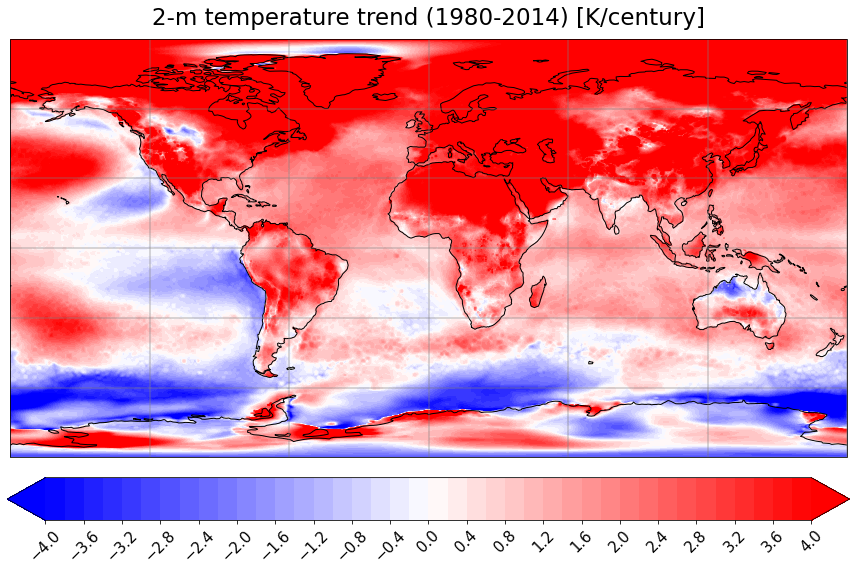

In [26]:
%%time
_figure_maker(data=temp_trend * 12 * 100, 
              levels=np.arange(-4,4.01,0.2),
              color_map='bwr',
              title='2-m temperature trend (1980-2014) [K/century]', 
              filename='temperature-trend')

### *2-m dewpoint temperature trend(1980-2014) [K/century]*

CPU times: user 19.7 s, sys: 67.4 ms, total: 19.8 s
Wall time: 20 s


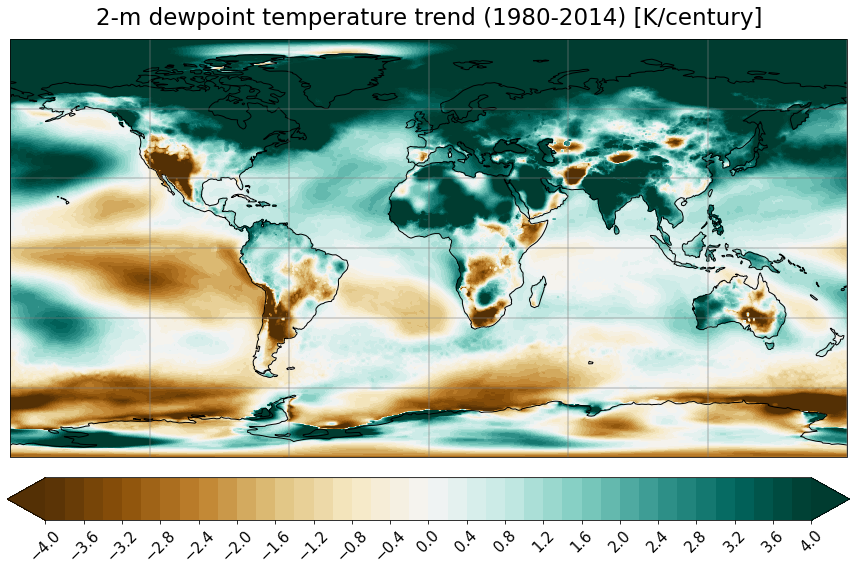

In [27]:
%%time
_figure_maker(data=dew_point_trend * 12 * 100, 
              levels=np.arange(-4,4.01,0.2),
              color_map='BrBG',
              title='2-m dewpoint temperature trend (1980-2014) [K/century]', 
              filename='dewpoint-temperature-trend')

### *msl trend (1980-2014) [hPa/century]*

CPU times: user 9.73 s, sys: 54.9 ms, total: 9.78 s
Wall time: 9.9 s


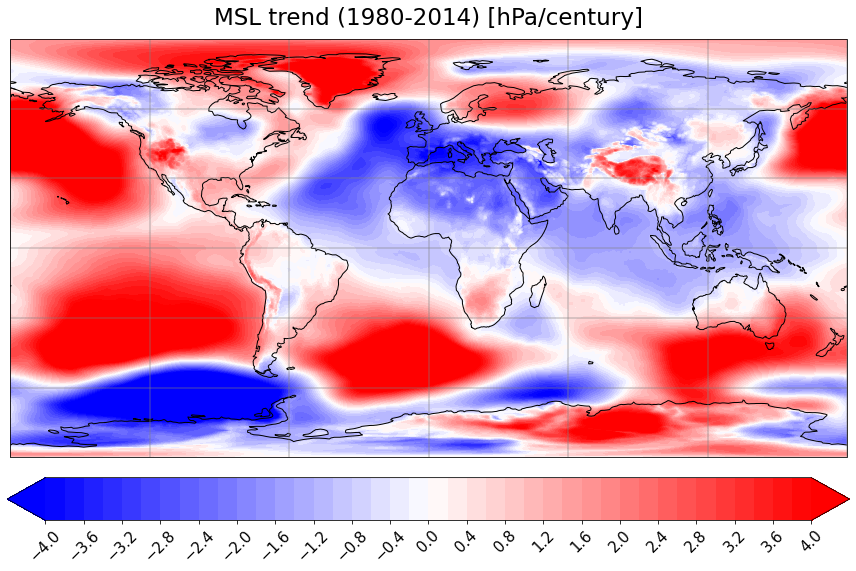

In [28]:
%%time
_figure_maker(data=msl_trend*13, 
              levels=np.arange(-4,4.01,0.2),
              color_map='bwr',
              title='MSL trend (1980-2014) [hPa/century]', 
              filename='mean-sea-level-trend')

# Scalar and Winds Function

In [29]:
%%time
def plot_scalar_and_winds(data, levels, color_map:str, title:str, filename:str):

    #plotting
    fig, ax = plt.subplots(figsize=(15, 8.5), subplot_kw={'projection':ccrs.PlateCarree()})
    ax.add_feature(cfeature.COASTLINE, edgecolor='black')
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.STATES, edgecolor='black', linewidth=1.75)
    cyclic_data, lons2use = add_cyclic_point(data, coord=data['longitude'])
    cs=ax.contourf(lons2use,
                   data['latitude'], 
                   cyclic_data,  
                   levels=levels,
                   transform=ccrs.PlateCarree(),
                   cmap=color_map,
                   extend='both',
                   )
    
    gl = ax.gridlines(crs=ccrs.PlateCarree(), linewidth=2, color='grey', alpha=0.3, draw_labels=False)
    # lonW, lonE, latS, latN = -127, -90, 25, 47 # coordinate of America
    lonW, lonE, latS, latN = -149, -70, 10, 65 # coordinate of America
    ax.set_extent( (lonW, lonE, latS, latN) )
    ax.set_title(title, pad=14, fontsize=23)
    #add wind barbs

    zonal_wind = zonal_wind_trend * 12*100
    meridional_wind = meridional_wind_trend * 12*100
    
    barbs = ax.barbs(data['longitude'][::10], 
             data['latitude'][::10], 
             zonal_wind[::10, ::10]*20,
             meridional_wind[::10, ::10]*20,
             sizes=dict(emptybarb=0),
            length=6.5,
            transform=ccrs.PlateCarree())

    #add a colorbar axis at the bottom of the graph
    cbar_ax = fig.add_axes([0.122, -0.1, 0.78, 0.07]) #lbwh
    # colorbar 
    cbar=fig.colorbar(cs, cax=cbar_ax, orientation='horizontal', ticks=levels[::2])
    cbar.ax.tick_params(labelsize=15,rotation=45)
    fig.patch.set_facecolor('xkcd:white')
    fig.subplots_adjust(bottom=0.01)
    fig.savefig('./labs4dynamics/lab2plots/%s.png' %(filename),dpi=300)


CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.68 µs


### *MSL trend overlaying barbs*

CPU times: user 10.2 s, sys: 23.9 ms, total: 10.2 s
Wall time: 10.3 s


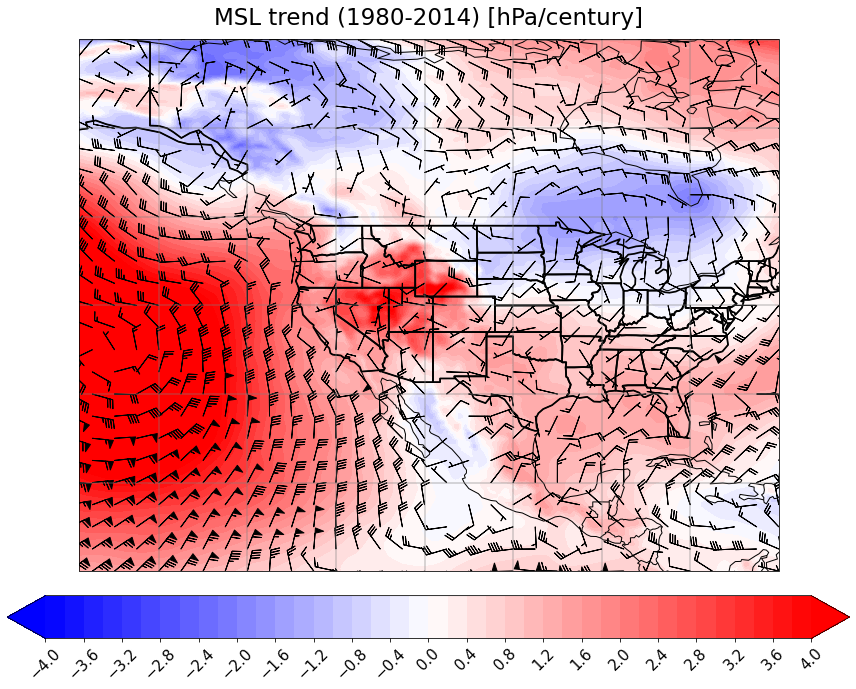

In [30]:
%%time
plot_scalar_and_winds(data=msl_trend*13, 
              levels=np.arange(-4,4.01,0.2),
              color_map='bwr',
              title='MSL trend (1980-2014) [hPa/century]', 
              filename='msl-trend-barbs')

### *2-m dew point overlaying barbs*

CPU times: user 20.2 s, sys: 31.5 ms, total: 20.2 s
Wall time: 20.8 s


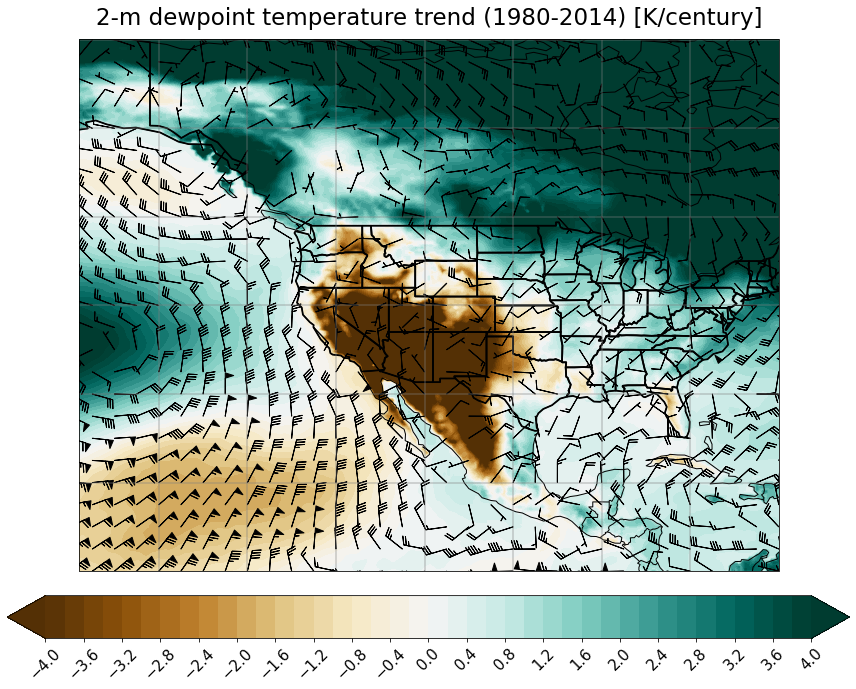

In [31]:
%%time
plot_scalar_and_winds(data=dew_point_trend * 12 * 100, 
              levels=np.arange(-4,4.01,0.2),
              color_map='BrBG',
              title='2-m dewpoint temperature trend (1980-2014) [K/century]', 
              filename='dewpoint-temp-trend-barbs')

### *2-m temperature trend overlaying barbs*

CPU times: user 22.4 s, sys: 64.1 ms, total: 22.5 s
Wall time: 22.8 s


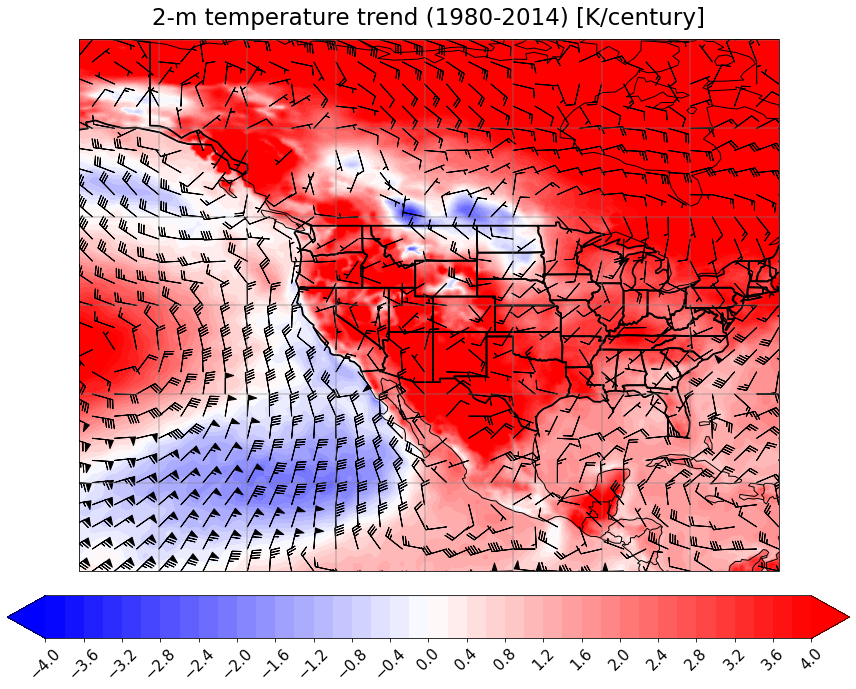

In [32]:
%%time
plot_scalar_and_winds(data=temp_trend * 12 * 100, 
              levels=np.arange(-4,4.01,0.2),
              color_map='bwr',
              title='2-m temperature trend (1980-2014) [K/century]', 
              filename='temp-trend-barbs')

### Wind speed

In [33]:
wind_speed_trends = xr.open_dataset('wind-speed-trend.nc')['__xarray_dataarray_variable__']
wind_speed_trends

<xarray.DataArray '__xarray_dataarray_variable__' (latitude: 721, longitude: 1440)>
[1038240 values with dtype=float64]
Coordinates:
  * latitude   (latitude) float64 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8

CPU times: user 23 s, sys: 51.3 ms, total: 23 s
Wall time: 23.6 s


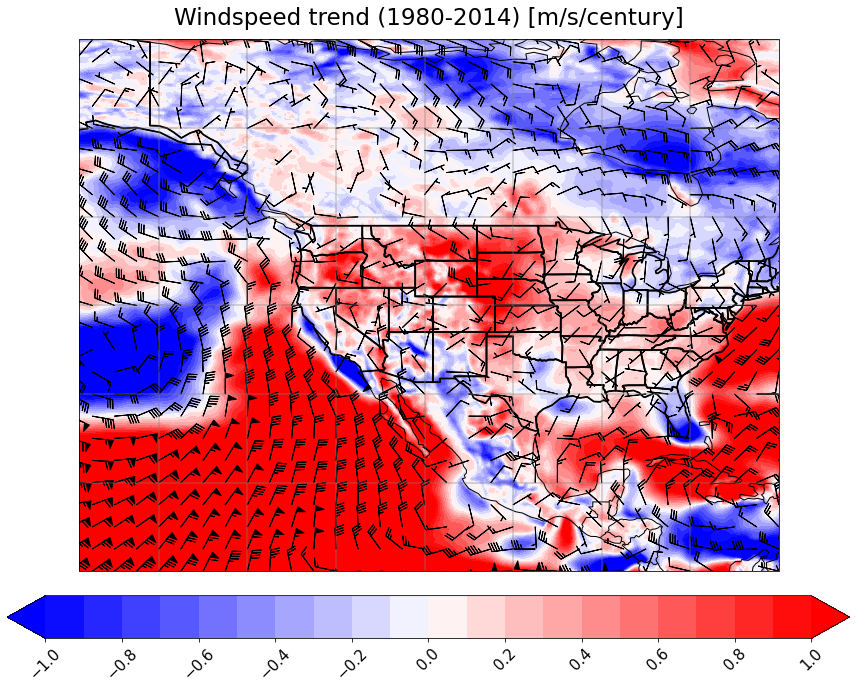

In [34]:
%%time
plot_scalar_and_winds(data=wind_speed_trends* 12 * 100, 
              levels=np.arange(-1,1.01,0.1),
              color_map='bwr',
              title='Windspeed trend (1980-2014) [m/s/century]', 
              filename='windspeed-trend-barbs')

### *total precipitation trend (1980-2014) [mm/d/century]*

CPU times: user 1min 37s, sys: 215 ms, total: 1min 37s
Wall time: 1min 39s


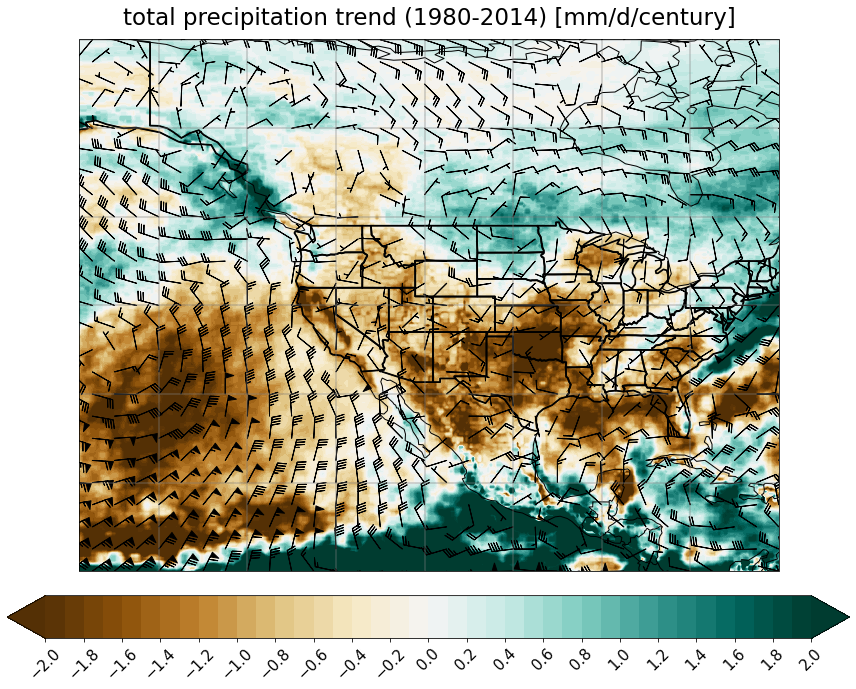

In [35]:
%%time
plot_scalar_and_winds(data=total_rain_trend*12*100, 
              levels=np.arange(-2,2.01,0.1),
              color_map='BrBG',
              title='total precipitation trend (1980-2014) [mm/d/century]', 
              filename='total-precipitation-trend')

### *large-scale precipitation trend (1980-2014) [mm/d/century]*

CPU times: user 53 s, sys: 103 ms, total: 53.1 s
Wall time: 53.9 s


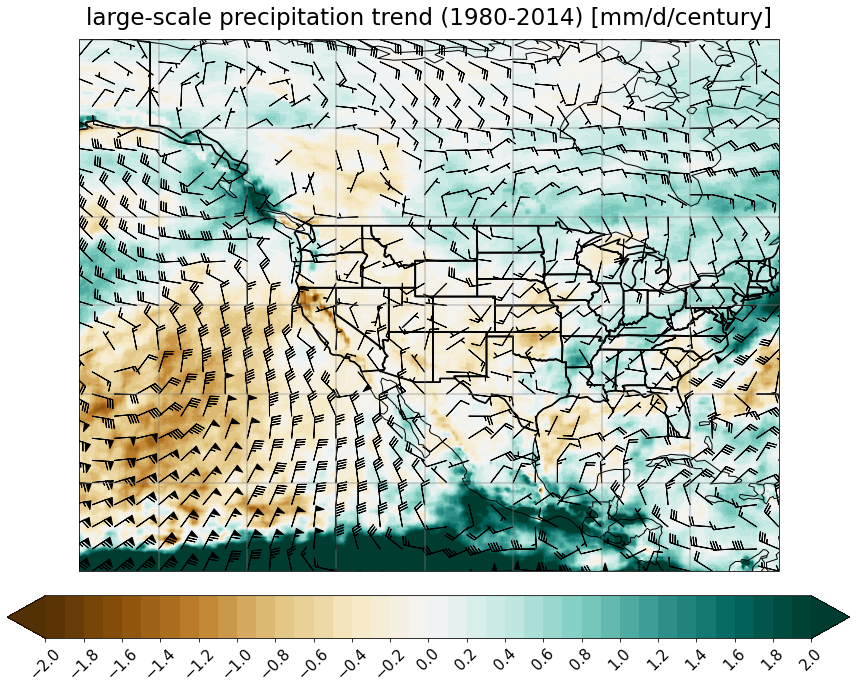

In [36]:
%%time
plot_scalar_and_winds(data=lsrr_trend*12*100, 
              levels=np.arange(-2,2.01,0.1),
              color_map='BrBG',
              title='large-scale precipitation trend (1980-2014) [mm/d/century]', 
              filename='large-scale-precipitation-trend')

### *convective precipitation trend (1980-2014) [mm/d/century]*

CPU times: user 3min 44s, sys: 245 ms, total: 3min 44s
Wall time: 3min 48s


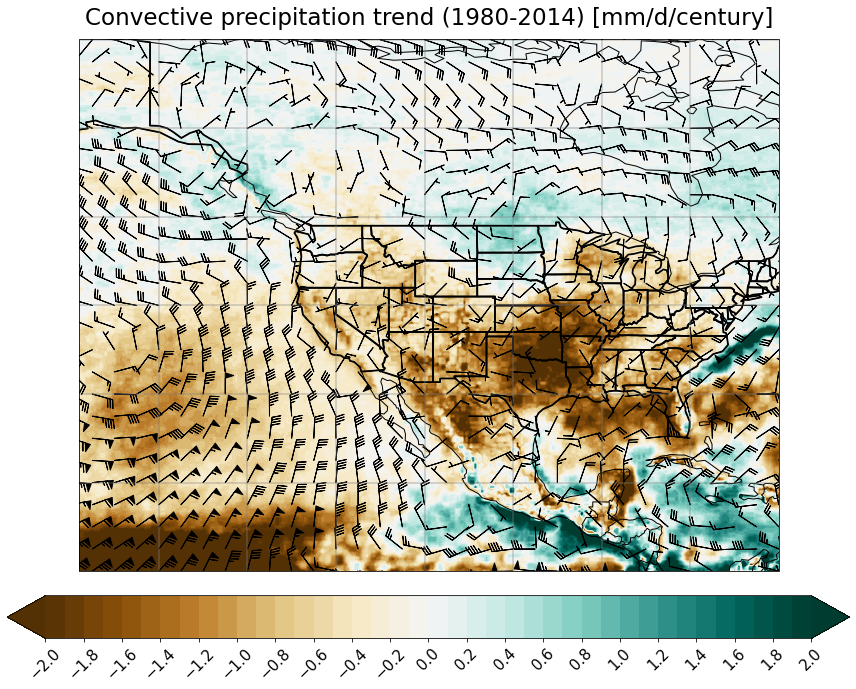

In [37]:
%%time
plot_scalar_and_winds(data=crr_trend*12*100, 
              levels=np.arange(-2,2.01,0.1),
              color_map='BrBG',
              title='Convective precipitation trend (1980-2014) [mm/d/century]', 
              filename='convective-precipitation-trend')